## What is a Neuron?
A neuron is a fundamental unit that applies a specific function, such as a logistic regression function, to predict binary outcomes (1 or 0) based on the given input.

## How Do Neurons Work?
For example, one neuron might learn to recognize a koala's eye, while another learns to identify the koala's legs. If several neurons collectively predict 1, indicating recognition of both the koala's eyes and legs, the overall output suggests a positive identification of the koala in the image. This collaborative functioning of neurons forms the basis of computer vision.


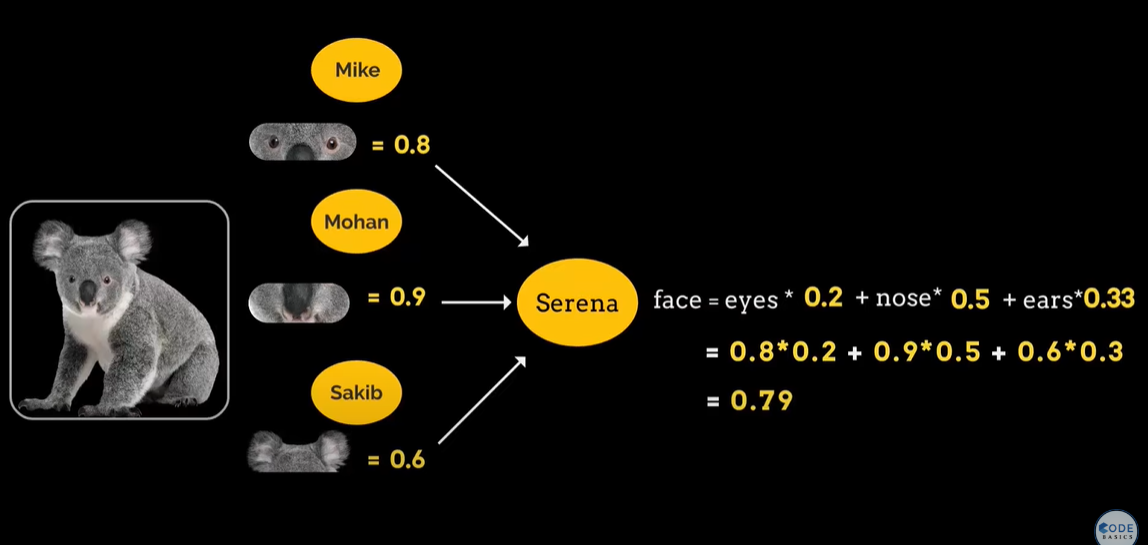

Then, the input is processed using the network of neurons (like the regression function mentioned earlier) to predict the final value of Y. If the prediction is incorrect, for instance, predicting that it's not a koala when it is, and feedback is provided that it is indeed a koala, this information is fed back into the system. The system learns from this feedback and aims to output the correct prediction the next time. This process is known as Backpropagation.

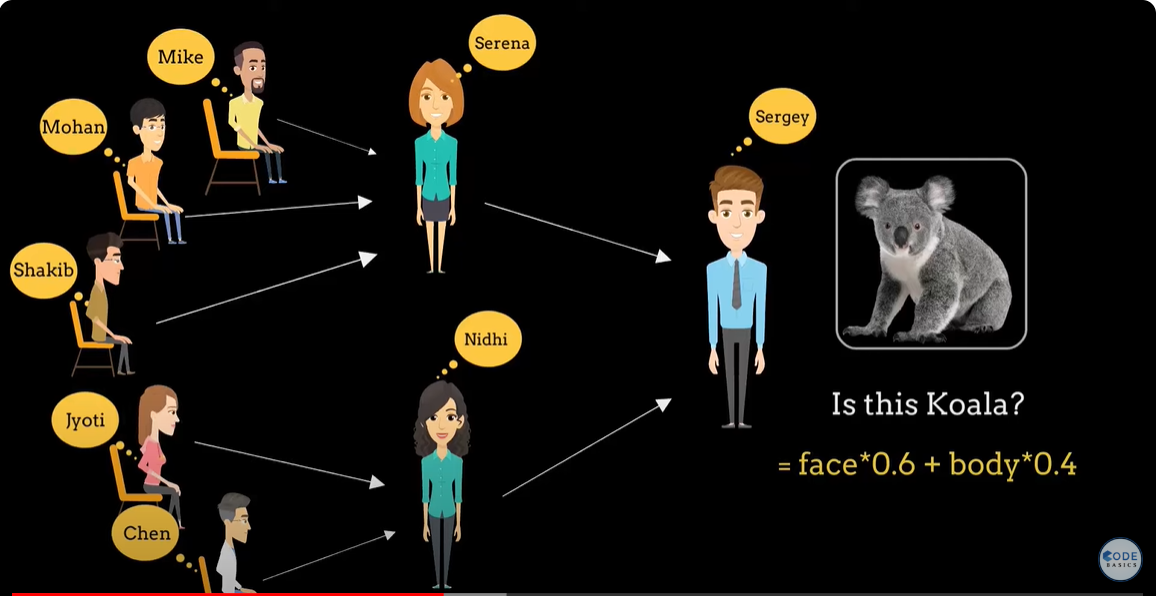

So, here's how it works: you input an image of a koala and the model makes a prediction. If the prediction is incorrect, the model learns from this mistake, improving its ability to correctly identify that koala in future attempts. This process continues with new images of koalas, where the model learns from past errors and gradually enhances its accuracy over time, much like how the human brain learns from mistakes.

## Neural Network for Recognizing Handwritten Digits

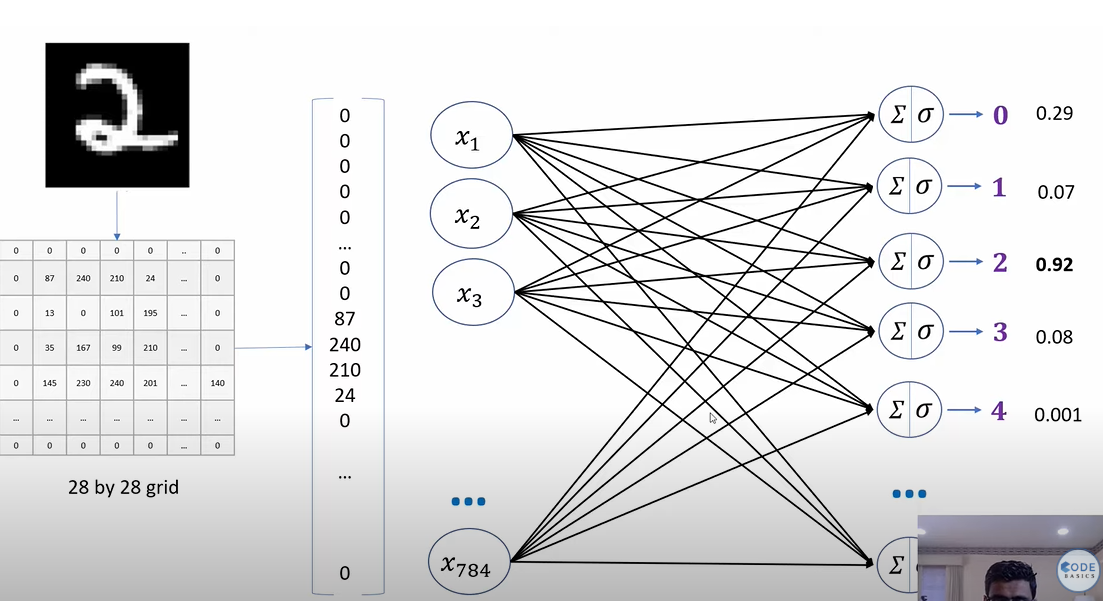

In the above image, you can see that each x1, x2, x3, etc., represents a variable. The image will be converted into a matrix and then stretched into a single array; these will be the values for the variables x1, x2, and so on. In this manner, you feed different images of the number '2' to the variables (x1, x2, ...) while training the model.

The numeric matrix is derived in such a way that wherever there are white pixels in the image, the pixel intensity will be high. Consequently, the numbers in those corresponding positions in the matrix will be high, indicating the darkness and aiding in pattern recognition. Please refer to the image below for an example.

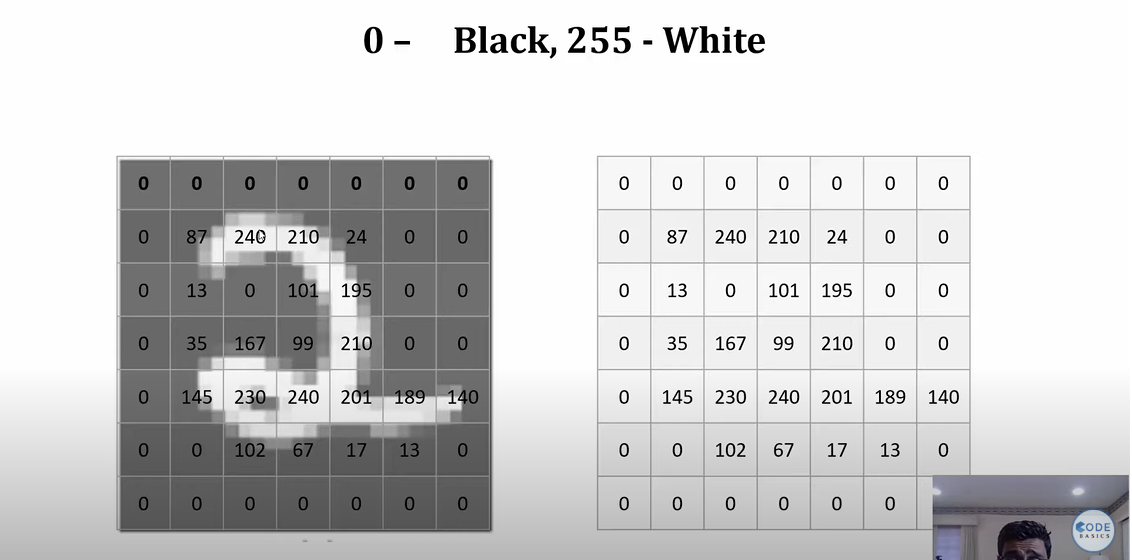

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()
# Above is the keras 3D dataset that contains the handwritten images data which will give the output to two tuples. 1st tuple is has X_train and y_train. And the 2nd output has X_test and y_test.
# This is a ready dataset for train and testing of the model to learn, so it comes like that train and test.

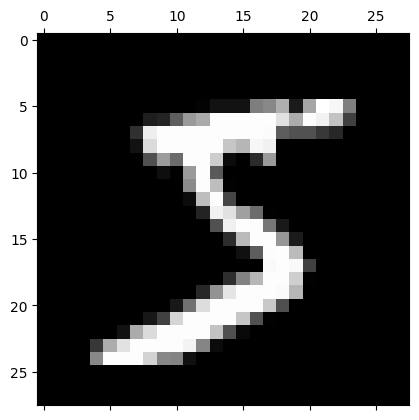

In [ ]:
plt.matshow(X_train[0], cmap='gray')
# This is to plot the first layer of the data (i.e numbered matrix) in a color form.

In [ ]:

X_train_flattened = X_train.reshape(len(X_train), (X_train.shape[1])**2)
X_test_flattened = X_test.reshape(len(X_test), (X_test.shape[1])**2)
# Here we are converting the matrix 28*28 (of one image which is the layers dimension) into one dimensional array. And these multiple one dimensioanl arrays are added to form the rows of the 2D dataset.
# Target variable here is y_train which is classification of numbers from 0 to 9.

# Scaling on flattened data
scaler = MinMaxScaler()
X_train_flattened = scaler.fit_transform(X_train_flattened)
X_test_flattened = scaler.transform(X_test_flattened)

# Scaling on unflattened data for later use (It's always better to do MinMaxScaling only for the unflattened 3D data as well as the number 255 is not constant and varies image bit to bit)
X_train = X_train/255
X_test = X_test/255

In [ ]:
# Building the neural networks model
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='softmax')
])
# Here Dense means interconnected neural network
# Here 10 means the number of the output values which here is 0 to 9
# Here use softmax method of activation which is a activation method to predict the multi classification variable. Here it is a type that involves fitting a separate binary logistic regression model for each class and getting the probability score for each class while predicting just like how we saw in the above neural network image.

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Adam: it's an algorithm used during the backward propagation process to update the weights of the neural network more efficiently.
# Here sparse_categorical_crossentropy is the mathematical method used to fit the logistic regression just like how Mean Squared Error method in linear regression
# Here accuracy means the evaluation metric to see the performance of the model

model.fit(X_train_flattened, y_train, epochs=5)
# this is to fit the model metrics on the train data to train
# epochs=5 means number of iterations till which the neural network is going to run the training and updating the weights.

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4692 - accuracy: 0.8773
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3038 - accuracy: 0.9159
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2835 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2730 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2664 - accuracy: 0.9251


In [ ]:
# Evaluating the model on the test data.
model.evaluate(X_test_flattened, y_test)
# Here we give y_test just to check the accuracy score on the test data. This is only used during the ML development stage. When deployed in the real world, we can code "model.predict(X_test_flattened)" just for prediction based on the training.

313/313 [==============================] - 1s 2ms/step - loss: 0.2677 - accuracy: 0.9262


[0.2676943242549896, 0.9261999726295471]

In [ ]:
# predicting on the test data
predicted = pd.DataFrame(model.predict(X_test_flattened))
# Now this will give a dataset of rows that were in the test data (i.e 10000) and columns from 0 to 9 and their predicted probability scores.
# In all the multiclassification you convert the target categories into numerical and then feed to the model. Then the output will have the columns ordered in the ascending order of that numbers so that you can match the probability score of a particular column to the specific category for interpretation.

313/313 [==============================] - 1s 2ms/step


Text(0.5, 1.0, 'Given Image')

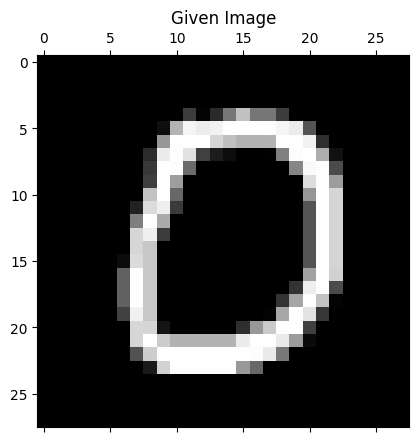

In [ ]:
plt.matshow(X_test[10], cmap='gray')
plt.title('Given Image')

In [ ]:
print(f"Predicted Number: {predicted.columns[(predicted.iloc[10]==max(predicted.iloc[10].values.flatten()))].tolist()[0]}")

# Or we can use the short one like below

print(f"Predicted Number: {np.argmax(predicted.iloc[10])}")
# np.argmax() gives the index postition/column name of the maximum in the given row.

Predicted Number: 0
Predicted Number: 0


In [ ]:
y_pred = [np.argmax(predicted.iloc[i]) for i in range(len(predicted))]

In [ ]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Text(0.5, 47.7222222222222, 'Predicted')

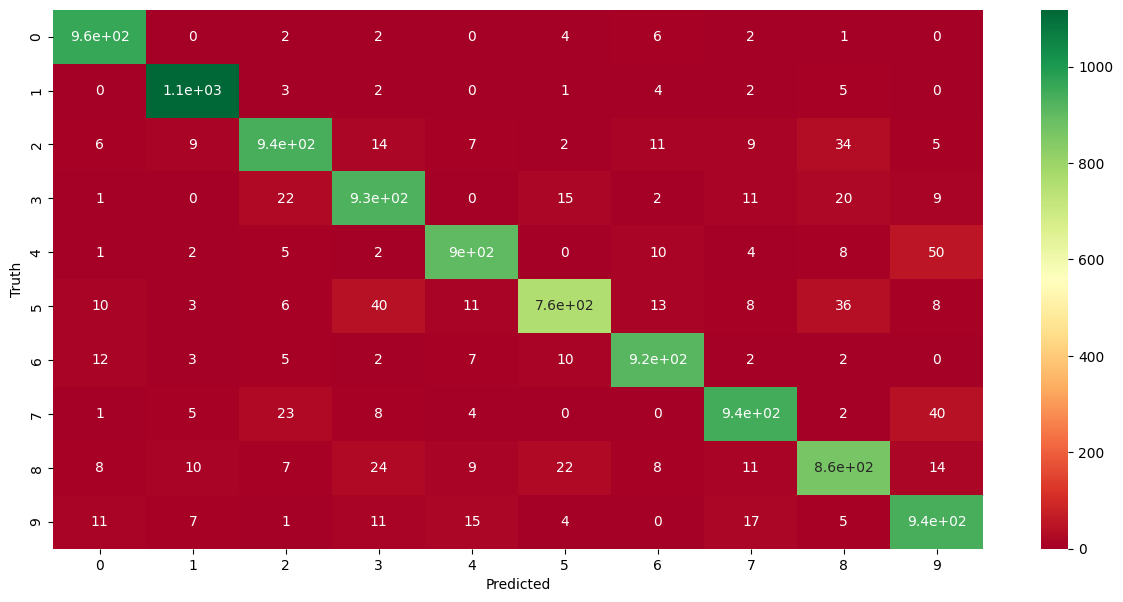

In [ ]:
# Building confusion matrix to see the predictions
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)
cm
# Visualizing the confusion matrix to better appearance
plt.figure(figsize=(15,7))
sns.heatmap(data=cm, annot=True, cmap='RdYlGn')
plt.ylabel('Truth')
plt.xlabel('Predicted')

In the heatmap above, you can observe that the number '0' was correctly predicted 960 times. However, there were errors: the model incorrectly predicted '0' as '2' once and as '5' seven times, among other mistakes. The confusion matrix totals 10,000 entries, corresponding to the count of the test data.

In the initial setup, our model used only two layers of neural networks (input and output). To improve accuracy, we will now add a hidden layer. Hidden layers help uncover complex patterns by recognizing non-linear relationships and identifying hidden connections.

For example, consider identifying the number '7' from an image. In the hidden layer, the model might recognize that a common feature of '7' is a horizontal line at the top. The model assigns higher weight to this feature. In the subsequent hidden layer or output layer, it combines this observation with other elements, such as the vertical stroke, to conclude that it is indeed the number '7'. This process is similar to identifying a koala image, where hidden layers separately identify features like the face and body, and the final output layer integrates these features based on their weighted significance to recognize it as a koala.

In [ ]:
# Building another model with the hidden layer that is with the relu activation method.
model2 = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), # Middle (hidden) layer will be 100 neurons
    keras.layers.Dense(10, activation='softmax')
])
# In the 1st layer Relu activation function is used which is helps in making the model non linear and captures the complex patterns and relation between the predictors and taget.
# Relu is the most common type of activation function used in the hidden layers to learn the complex patterns.

model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model2.fit(X_train_flattened, y_train, epochs=5)
# Now that from the below model you can see that the accuracy of the model has been increased after adding the hidden layers.

Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2679 - accuracy: 0.9238
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1254 - accuracy: 0.9632
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0857 - accuracy: 0.9741
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0648 - accuracy: 0.9811
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0511 - accuracy: 0.9845


313/313 [==============================] - 1s 2ms/step


Text(0.5, 47.7222222222222, 'Predicted')

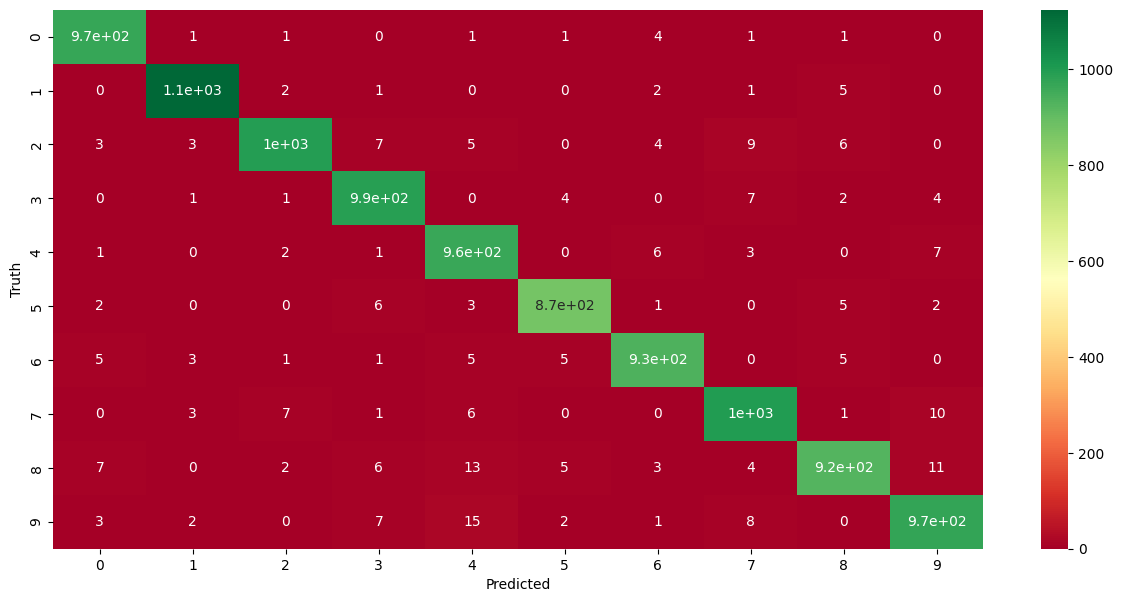

In [ ]:
predicted = pd.DataFrame(model2.predict(X_test_flattened))
y_pred = [np.argmax(predicted.iloc[i]) for i in range(len(predicted))]

# Building confusion matrix to see the predictions
cm = tf.math.confusion_matrix(labels = y_test, predictions = y_pred)
cm
# Visualizing the confusion matrix to better appearance
plt.figure(figsize=(15,7))
sns.heatmap(data=cm, annot=True, cmap='RdYlGn')
plt.ylabel('Truth')
plt.xlabel('Predicted')

In [ ]:
# If you dont want to flatten the data into array manually you can do that directly in the model itself like below.

# Building another model with the hidden layer that is with the relu activation method.
model2 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(100, activation='relu'), # Middle (hidden) layer will be 100 neurons
    keras.layers.Dense(10, activation='softmax')
])
# In the 1st layer Relu activation function is used which is helps in making the model non linear and captures the complex patterns and relation between the predictors and taget.
# Relu is the most common type of activation function used in the hidden layers to learn the complex patterns.

model2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model2.fit(X_train, y_train, epochs=5)
# Now that from the below model you can see that the accuracy of the model has been increased after adding the hidden layers.

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2711 - accuracy: 0.9232
Epoch 2/5
1875/1875 [==============================] - 8s 5ms/step - loss: 0.1233 - accuracy: 0.9636
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0857 - accuracy: 0.9737
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0652 - accuracy: 0.9809
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0505 - accuracy: 0.9844


Step Function (Activation Function): This is not good most of the times because it cannot capture the probability scores in between 0 and 1.

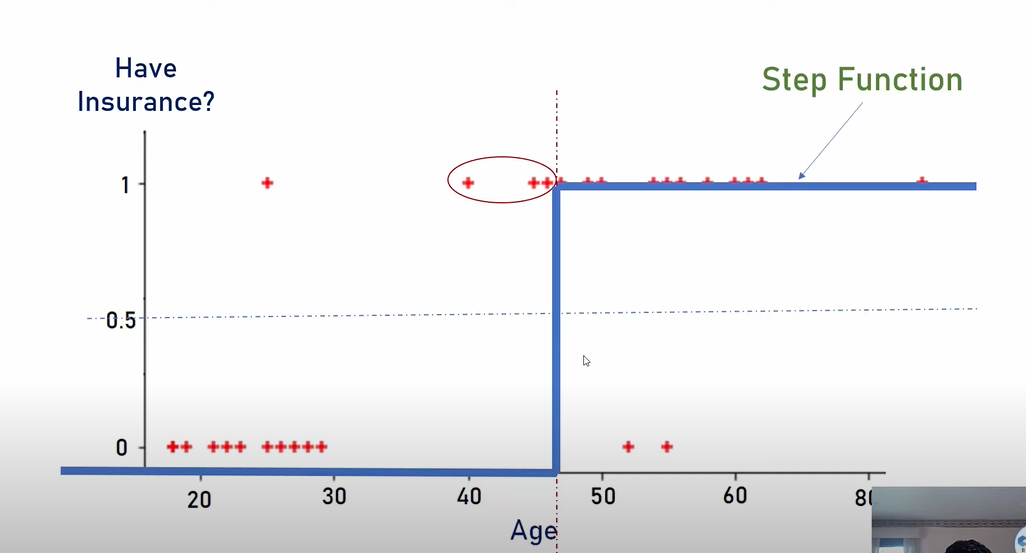

tanh (Activation Function): Tanh is another activation function that outputs values between -1 and 1, similar to how the sigmoid function outputs values between 0 and 1.

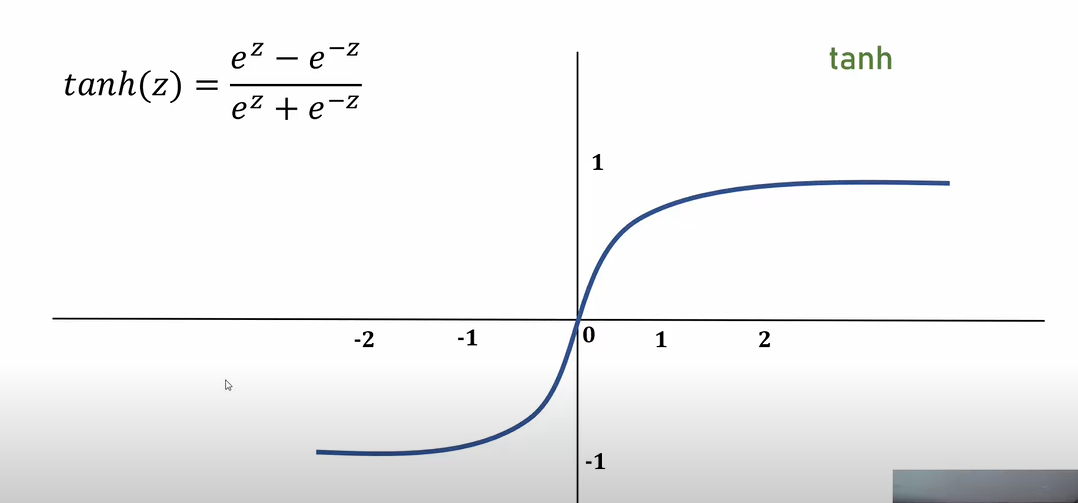

In the video, he recommends using the tanh activation function in all hidden layers and sigmoid in the output layer.

Gradients: These can be thought of as the coefficients or weights of an equation. Gradient descent is a method used to minimize the loss function by checking the change in weights or coefficients for each value of the loss function.

Activation Functions:

Sigmoid: Outputs values between 0 and 1.
tanh: Outputs values between -1 and 1.
ReLU: Outputs 0 for values less than 0, and the input value for values greater than 0.
Softmax: Outputs a probability distribution between 0 and 1.
Leaky ReLU: Outputs 0.1*x for values less than 0, and the input value for values greater than 0.